In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('HR_comma_sep.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.shape

(14999, 10)

<h2 style="color:crimson;">Data Exploration and Visualization</h2>

In [6]:
df[df.left==0].shape

(11428, 10)

In [7]:
df[df.left==1].shape

(3571, 10)

### Average numbers for all columns

In [8]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions:

    1. "Satisfaction_level" Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
    2. "Average_monthly_hours" employees leaving the firm spent more time compared to the retained ones (199 vs 207)
    3. "Time_spend_company" is higher for leaving employees
    4. "Promotion_last_5years" Employees who are given promotion are likely to be retained at firm

### Impact of salary on employee retention

<AxesSubplot:xlabel='salary'>

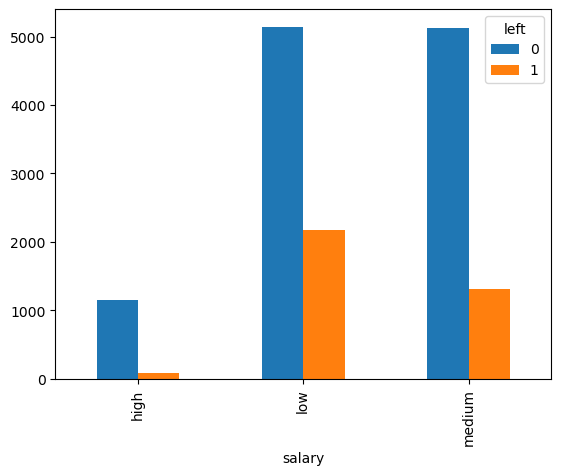

In [9]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

" Employees in low and medium salary range are likely to leave the company. "

### Department wise employee retention rate

<AxesSubplot:xlabel='Department'>

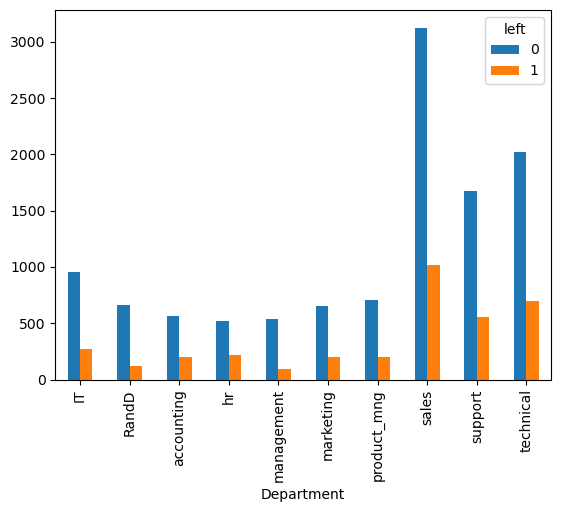

In [10]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

" From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis "

## From the data analysis so far we can conclude that we will use following variables as independant variables in our model:

 1. "Satisfaction_level"
 2. "Average_montly_hours"
 3. "Time_spend_company"
 4. "Promotion_last_5years"
 5. "Salary"

In [13]:
newdf = df[['satisfaction_level', 'average_montly_hours', 'time_spend_company', 'promotion_last_5years', 'salary']]

In [14]:
newdf.head(10)

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary
0,0.38,157,3,0,low
1,0.80,262,6,0,medium
2,0.11,272,4,0,medium
3,0.72,223,5,0,low
4,0.37,159,3,0,low
5,0.41,153,3,0,low
6,0.10,247,4,0,low
7,0.92,259,5,0,low
8,0.89,224,5,0,low
9,0.42,142,3,0,low


<h2 style="color:crimson;">Replacing Salary with one-hot-encoding</h2>

In [15]:
salary_dummies = pd.get_dummies(newdf.salary, prefix='salary')

In [16]:
dummy_df = pd.concat([newdf, salary_dummies], axis='columns')

In [17]:
dummy_df.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,3,0,low,0,1,0
1,0.80,262,6,0,medium,0,0,1
2,0.11,272,4,0,medium,0,0,1
3,0.72,223,5,0,low,0,1,0
4,0.37,159,3,0,low,0,1,0


In [18]:
dummy_df.drop('salary', axis='columns', inplace=True)
dummy_df.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,3,0,0,1,0
1,0.80,262,6,0,0,0,1
2,0.11,272,4,0,0,0,1
3,0.72,223,5,0,0,1,0
4,0.37,159,3,0,0,1,0


In [19]:
x = dummy_df
y = df[['left']]

<h2 style="color:crimson;">Creating and Training model</h2>

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()

In [29]:
model.fit(x_train, y_train)

/home/a_ahad/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/a_ahad/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
model.predict(x_test)

array([0, 1, 0, ..., 0, 1, 0])

In [31]:
model.score(x_test, y_test)

0.7677777777777778

<h2 style="color:crimson;">Confusion Matrix</h2>

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[3172,  267],
       [ 778,  283]])

Text(83.22222222222221, 0.5, 'Truth')

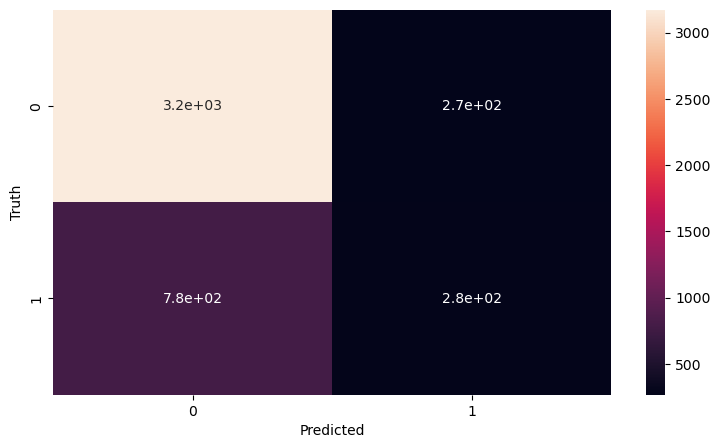

In [41]:
plt.figure(figsize=(9,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h2 style="color:crimson;">Classification Report</h2>

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3439
           1       0.51      0.27      0.35      1061

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500

